# [시계열 데이터 분석 기초](https://codetorial.net/tensorflow/time_series_forecasting/time_series_data.html)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['font.size'] = 12

import tensorflow as tf 
from tensorflow import keras 

plot_series()는 임의의 시간 값(time), 시계열 데이터(series)를 입력받아 그래프로 나타내는 함수입니다.

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel('time')
    plt.ylabel('value')

    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

## 경향성을 갖는 시계열 데이터

In [3]:
def trend(time, slope=0):
    return slope * time 

- trend()는 경향성을 갖는 시계열 데이터를 반환합니다.
- slope값에 따라서 시간에 따라 양의 경향성, 음의 경향성을 가질 수 있습니다.

예제에서는 길이 4*356+1의 시간 동안 시간에 따라 0.1의 기울기를 갖는 시계열 데이터를 만들었습니다.

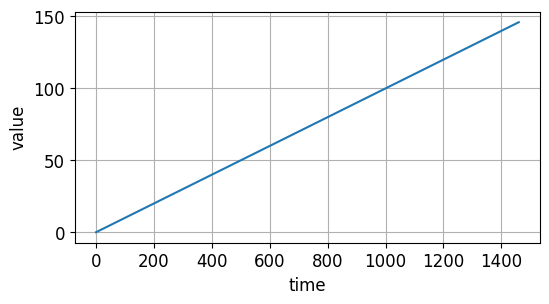

In [4]:
time = np.arange(4*365+1)
series = trend(time, slope=0.1)

plot_series(time, series)
plt.show()

## 계절성을 갖는 시계열 데이터

### 예제1

In [5]:
def seasonal_pattern(season_time):
    return np.where(
        season_time <0.6, 
        np.cos(season_time * 2 * np.pi),
        1 / np.exp(3 * season_time)
    )

In [6]:
def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period 
    return amplitude * seasonal_pattern(season_time)

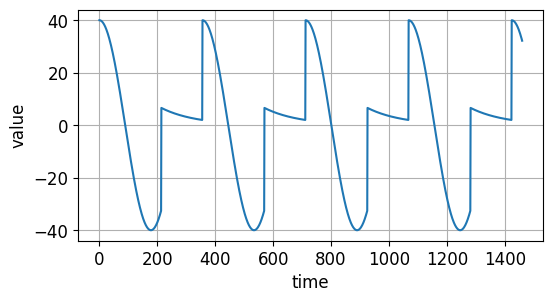

In [7]:
amplitude = 40 
series = seasonality(time, period=356, amplitude=amplitude)

plot_series(time, series)
plt.show()

### 예제2
경향성(trend)과 계절성(seasonality)

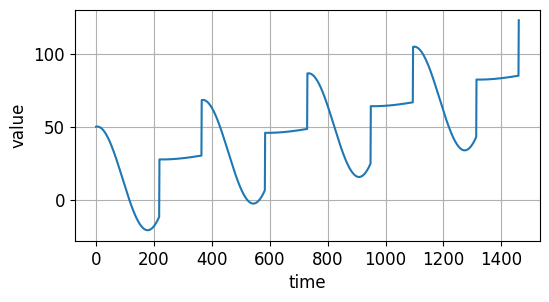

In [9]:
baseline = 10
slope = 0.05 

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

## 노이즈를 갖는 시계열 데이터 

### 예제1

In [10]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time)) * noise_level 

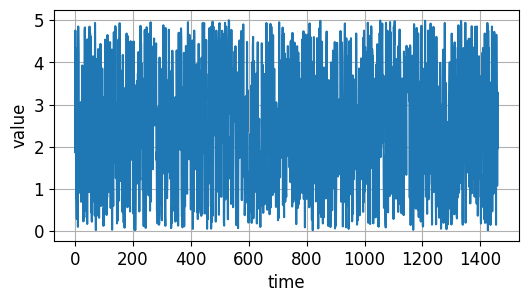

In [11]:
noise_levle = 5 
noise = white_noise(time, noise_levle, seed=42)

plot_series(time, noise)
plt.show() 

### 예제2
경향성 (Trend), 계절성 (Seasonality)과 노이즈 (Noise)

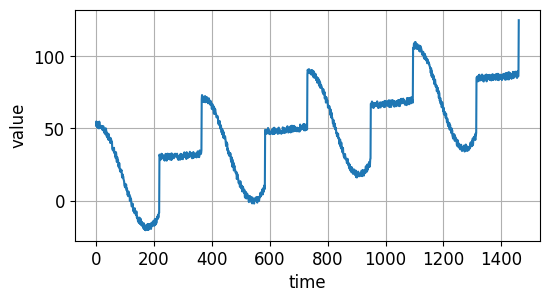

In [12]:
baseline = 10 
slope = 0.05
noise_level = 5 

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) \
        + white_noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()

## 자기상관성을 갖는 시계열 데이터

### 예제1

In [13]:
split_time = 1000
time_train, x_train = time[:split_time], series[:split_time]
time_valid, x_valid = time[split_time:], series[split_time:]

In [14]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    pi = 0.8
    ar =  rnd.randn(len(time) + 1) # 정규분포를 갖는 임의의 데이터 
    for step in range(1, len(time) + 1):
        ar[step] += pi * ar[step - 1]       ## 이전의 값의 0.8배를 더하기
    return ar[1:] * amplitude

- autocorrelation() 함수는 자기상관성 (Autocorrelation)을 갖는 시계열 데이터를 반환합니다.
- ar은 정규분포를 갖는 임의의 데이터입니다.
- 이전 시간 스텝 값의 0.8배를 더해주고, 크기 amplitude(진폭)를 곱한 시계열 데이터를 반환합니다.

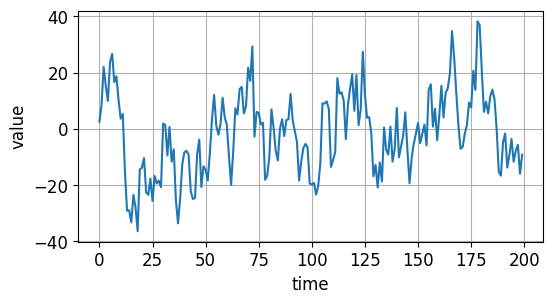

In [15]:
series = autocorrelation(time, 10, seed=42)

plot_series(time[:200], series[:200])
plt.show()

### 예제2
자기상관성 (Autocorrelation)과 경향성 (Trend)을 갖는 시계열 데이터를 만들었습니다.

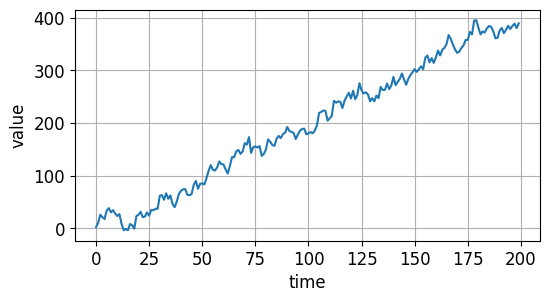

In [16]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

plot_series(time[:200], series[:200])
plt.show()

### 예제3
자기상관성 (Autocorrelation), 경향성 (Trend)과 함께 계절성 (Seasonality)을 갖는 시계열 데이터를 만들었습니다.

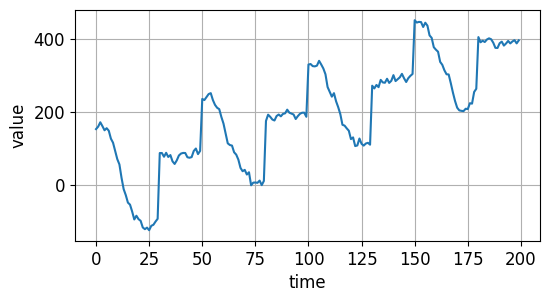

In [17]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

plot_series(time[:200], series[:200])
plt.show()

### 예제4
- 이번에는 특정 시점 이후로 다른 특성을 갖는 시계열 데이터를 만들어보겠습니다.
- 2/3 지점 이후로 크기 (amplitude)와 주기 (period), 경향성 (slope)이 모두 달라진 특성을 갖는 시계열 데이터입니다.
- 또한 전체 구간에서 노이즈 (Noise)를 갖습니다.

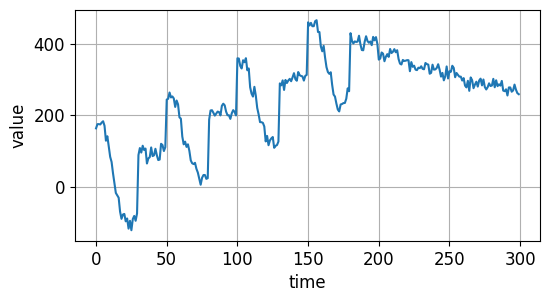

In [18]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

series[200:] = series2[200:]        # 자기상관 amp 10->5, 계절성 amp 150->2, 경향성 slope 2->-1 + 550
series += white_noise(time, 30)

plot_series(time[:300], series[:300])
plt.show()